In [1]:
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# Effect of pooling on t-test significance

Imagine that we sample 100 cells each from 5 mice and measure something about them before and after some manipulation as part of an experiment. The measurements from different mice will be slightly different because of sampling noise and because of systematic differences between the mice (eg calcium indicator expression). We would like to know 

In [3]:
# Draw two random samples from normal distributions with different means.
# First sample has a mean of zero, second sample has a mean of 0.5.
samples = np.asarray([
    np.random.normal(0, 1, 500),
    np.random.normal(0.5, 1, 500)
]).T

averaged_samples = []

kfold = KFold(n_splits=5, random_state=42, shuffle=False)

for _, test_inds in kfold.split(samples):
    averaged_samples.append(samples[test_inds, :].mean(axis=0))
    
averaged_samples = np.asarray(averaged_samples)

/opt/miniconda3/envs/candice/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


The two sampled distributions have 

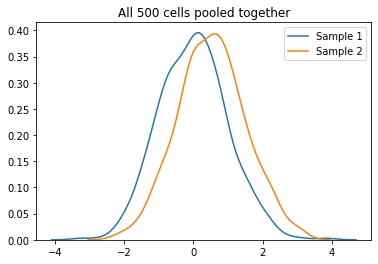

In [4]:
plt.title('All 500 cells pooled together')
sns.kdeplot(samples[:, 0], label='Before')
sns.kdeplot(samples[:, 1], label='After')

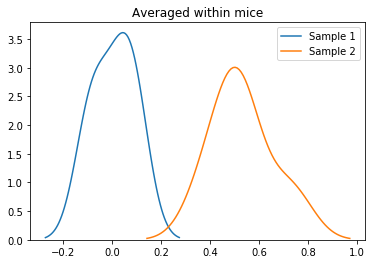

In [5]:
plt.title('Averaged within mice')
sns.kdeplot(averaged_samples[:, 0], label='Before')
sns.kdeplot(averaged_samples[:, 1], label='After')

## p-values

What p-values do we get if we perform a t-test on the averaged vs pooled data?

In [6]:
stats.ttest_rel(samples[:, 0], samples[:, 1])

Ttest_indResult(statistic=-8.47342372840654, pvalue=8.460275618434659e-17)

In [7]:
stats.ttest_rel(averaged_samples[:, 0], averaged_samples[:, 1])

Ttest_indResult(statistic=-7.752493797419347, pvalue=5.471448404548512e-05)

The p-value is much smaller when we pool data from different mice instead of averaging within mice.

In [8]:
p_vals = {
    'pooled': [],
    'unpooled': []
}

for seed in range(50):
    
    samples = np.asarray([
        np.random.normal(0, 1, 500),
        np.random.normal(0.5, 1, 500)
    ]).T
    
    p_vals['unpooled'].append(stats.ttest_ind(samples[:, 0], samples[:, 1])[1])
    
    averaged_samples = []
    
    for _, test_inds in kfold.split(samples):
        averaged_samples.append(samples[test_inds, :].mean(axis=0))

    averaged_samples = np.asarray(averaged_samples)
    p_vals['pooled'].append(stats.ttest_ind(averaged_samples[:, 0], averaged_samples[:, 1])[1])

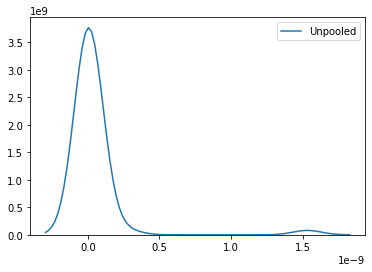

In [10]:
sns.kdeplot(p_vals['unpooled'], label='Unpooled')

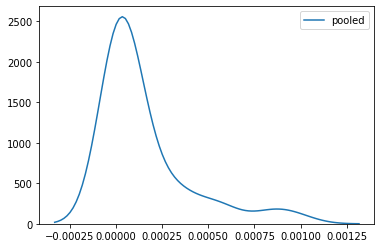

In [11]:
sns.kdeplot(p_vals['pooled'], label='pooled')

In [13]:
for pooling in p_vals:
    print(
        f'{pooling.capitalize()} p-values: '
        f'{np.mean(p_vals[pooling]):.3e} +/- {np.std(p_vals[pooling]):.3e}, '
        f'range {np.min(p_vals[pooling]):.3e} to {np.max(p_vals[pooling]):.3e}'
    )

Pooled p-values: 1.530e-04 +/- 2.413e-04, range 2.079e-07 to 9.848e-04
Unpooled p-values: 4.174e-11 +/- 2.170e-10, range 3.282e-25 to 1.533e-09
